# Group Writeup
Anzhelika Belozerova (238852),
Isabella Urbano-Trujillo (233239),
Camilo Pedraza Jimenez (226679),
Luis Fernando Ramirez Ruiz (222819),
Milton Mier (223594)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 1. Context 

What is the context? Refine the setup you proposed in the project memo and explain it in a paragraph.

In the context of global energy markets, predicting energy prices is a critical task that influences economic policy, business strategy, and individual decision-making. The European Union presents a very interesting case for such analysis due to its diverse energy sources, varying levels of energy dependency, and differing national energy policies. Our project focuses on predicting the energy prices of different countries within the EU using machine learning models.

- Unit of Analysis: Our units of analysis are the hourly energy prices of individual EU countries. These prices are measured in Euros per megawatt-hour (€/MWh) and are sourced from historical data provided by governmental and industry databases.
- Prediction Objective: The primary objective of this project is to predict future energy prices for EU countries, particularly energ prices 12 hours ahead. Accurate predictions will help in understanding the potential cost fluctuations and the factors driving these changes. This can be particularly valuable for stakeholders such as policymakers, energy companies, and consumers.
- Features: To make these predictions, we use past energy prices, some dummys that describe the period of time such as hour, day, week number, day of week and month, and finally, sources of energy such as biomass and gas.
- Application in Decision-Making: The predictions generated can be used in several decision-making contexts:
1. Policymaking: Governments can use the predictions to formulate energy policies, subsidies, and tariffs to stabilize the market.
2. Strategic Planning for Companies: Energy companies can plan their operations, investments, and pricing strategies based on predicted price trends.
3. Consumer Decision-Making: Businesses and residential consumers can make informed choices about energy consumption, contract negotiations, and investments in energy-efficient technologies.
4. Investment Strategies: Financial analysts and investors can use the predictions to guide investments in energy markets and related sectors.


## 2. EDA

What are some of the most important patterns in your data that you can observe through exploratory data analysis? For instance, what does the label look like? What do the simple bivariate relationships in the data look like? Will this affect any of your modeling choices

In [29]:
df = pd.read_csv('/Users/isdc/Library/CloudStorage/OneDrive-HertieSchool/2024-1/Machine Learning/ML project/dates_cleaned.csv', index_col=0)

In [30]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [31]:
print(df)

              Date Country  energy_price     biomass          gas  \
0       2015-01-01      CH         44.94  252.200902  1180.283774   
1       2015-01-01      CZ         26.48  135.000000   172.000000   
2       2015-01-01    DK_1         25.02   18.000000   233.000000   
3       2015-01-01    DK_2         27.38   25.000000   304.000000   
4       2015-01-01      EE         27.38  252.200902  1180.283774   
...            ...     ...           ...         ...          ...   
3294775 2023-12-31    SE_2         44.87  252.200902  1180.283774   
3294776 2023-12-31    SE_3         44.87  252.200902  1180.283774   
3294777 2023-12-31    SE_4         44.87  252.200902  1180.283774   
3294778 2023-12-31      SI         33.30  252.200902  1180.283774   
3294779 2023-12-31      SK         35.14  252.200902  1180.283774   

             nuclear  year  month  day  hour  week_number  day_of_week  
0        7185.089448  2015      1    1     0            1            3  
1        2596.000000  201

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3294780 entries, 0 to 3294779
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   Country       object        
 2   energy_price  float64       
 3   biomass       float64       
 4   gas           float64       
 5   nuclear       float64       
 6   year          int64         
 7   month         int64         
 8   day           int64         
 9   hour          int64         
 10  week_number   int64         
 11  day_of_week   int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 326.8+ MB
None


In [33]:
print(df.describe())

                                Date  energy_price       biomass  \
count                        3294780  3.294780e+06  3.294780e+06   
mean   2019-05-11 19:56:08.041812224  7.931905e+01  2.522009e+02   
min              2015-01-01 00:00:00 -5.000000e+02  0.000000e+00   
25%              2017-02-07 07:00:00  3.250000e+01  7.400000e+01   
50%              2019-03-29 04:00:00  4.800000e+01  2.522009e+02   
75%              2021-08-12 00:00:00  7.995000e+01  2.522009e+02   
max              2023-12-31 00:00:00  6.101780e+03  5.368250e+03   
std                              NaN  1.202656e+02  4.890990e+02   

                gas       nuclear          year         month           day  \
count  3.294780e+06  3.294780e+06  3.294780e+06  3.294780e+06  3.294780e+06   
mean   1.180284e+03  7.185089e+03  2.018858e+03  6.528544e+00  1.573202e+01   
min    0.000000e+00  0.000000e+00  2.015000e+03  1.000000e+00  1.000000e+00   
25%    1.770000e+02  7.185089e+03  2.017000e+03  4.000000e+00  8.000000

### What does the label look like?

In [34]:
df['Year'] = df['Date'].dt.year
annual_avg_price = df.groupby(['Country', 'Year'])['energy_price'].mean().reset_index()
pivot_table = annual_avg_price.pivot(index='Year', columns='Country', values='energy_price')

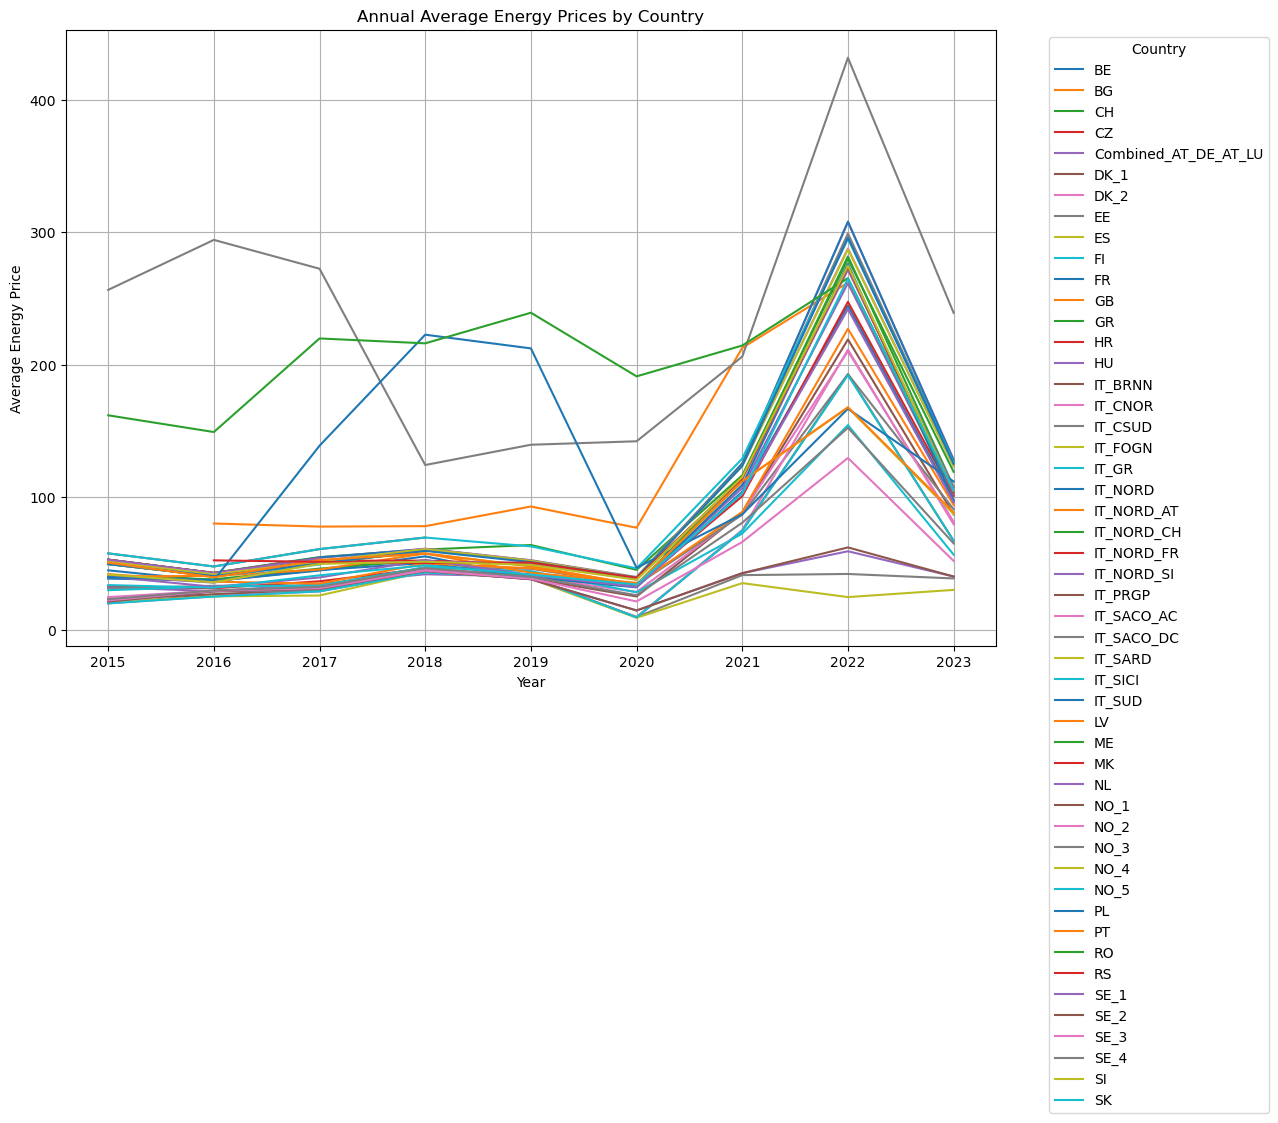

In [35]:
plt.figure(figsize=(12, 8))
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], marker='', label=column)

plt.title('Annual Average Energy Prices by Country')
plt.xlabel('Year')
plt.ylabel('Average Energy Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Time series analysis

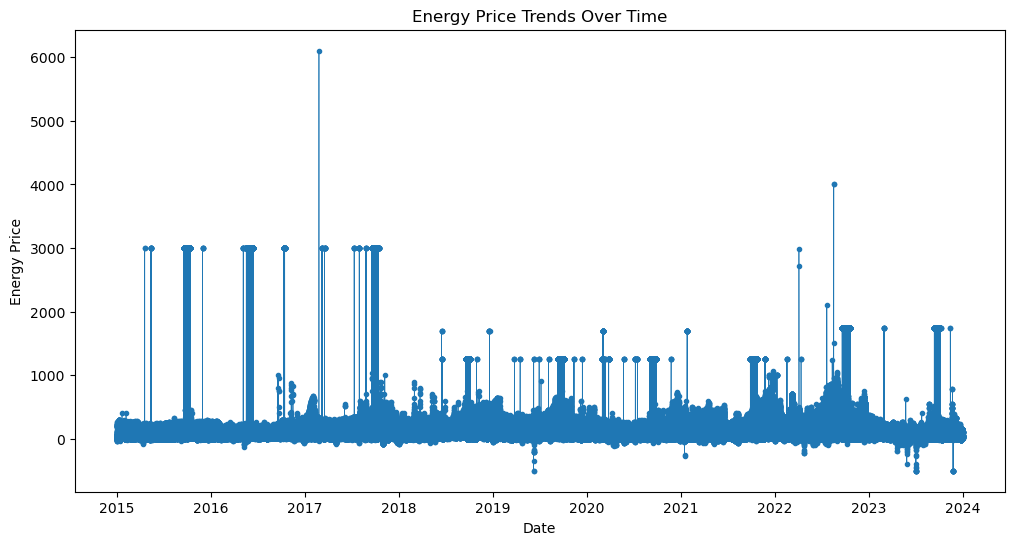

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['energy_price'], marker='.', linestyle='-', linewidth=0.5)
plt.title('Energy Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.show()


### Correlation analysis

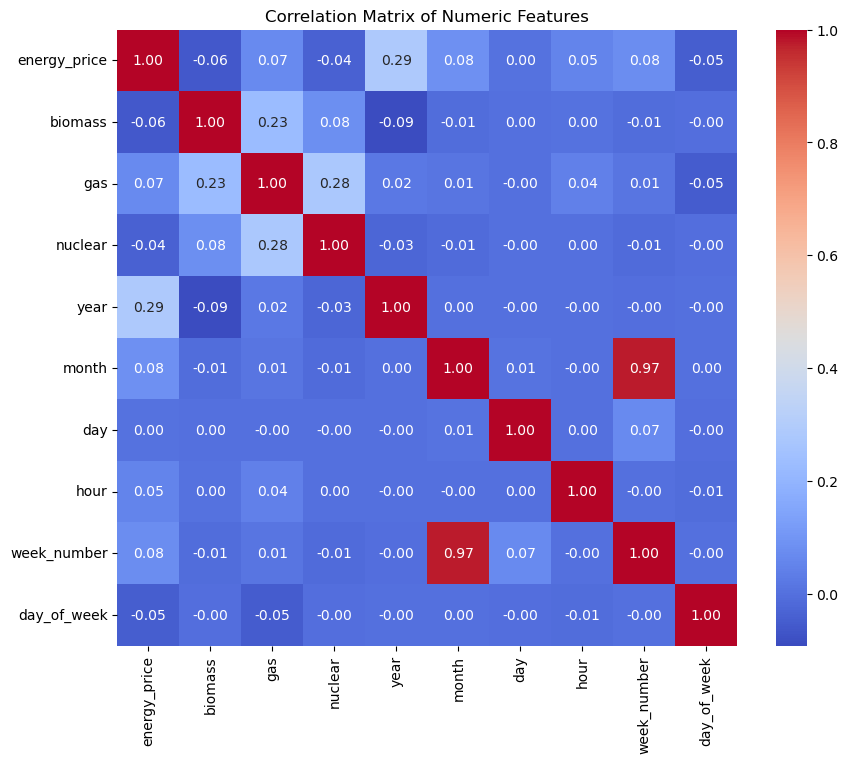

In [37]:
df = df.drop(columns=['Year'])

numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

We dropped the variables sources of energy solar and wind because of high correlation.

### Exploring relationship

In [38]:
df_2000 = df[df['energy_price'] <= 2000] # because after 2000 there are outliers

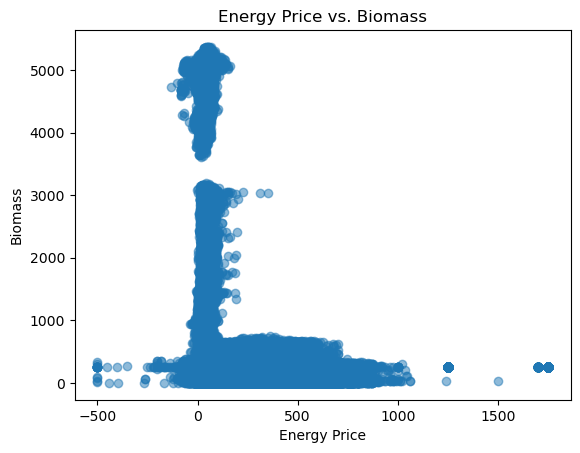

In [39]:
# Relationship target and biomass
plt.scatter(df_2000['energy_price'], df_2000['biomass'], alpha=0.5)
plt.title('Energy Price vs. Biomass')
plt.xlabel('Energy Price')
plt.ylabel('Biomass')
plt.show()

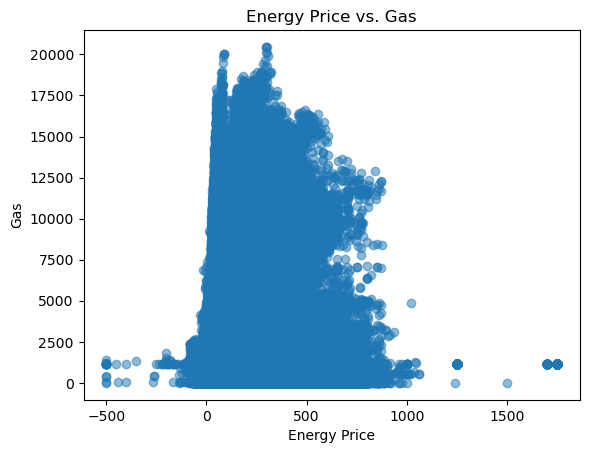

In [40]:
# Relationship target and gas
plt.scatter(df_2000['energy_price'], df_2000['gas'], alpha=0.5)
plt.title('Energy Price vs. Gas')
plt.xlabel('Energy Price')
plt.ylabel('Gas')
plt.show()

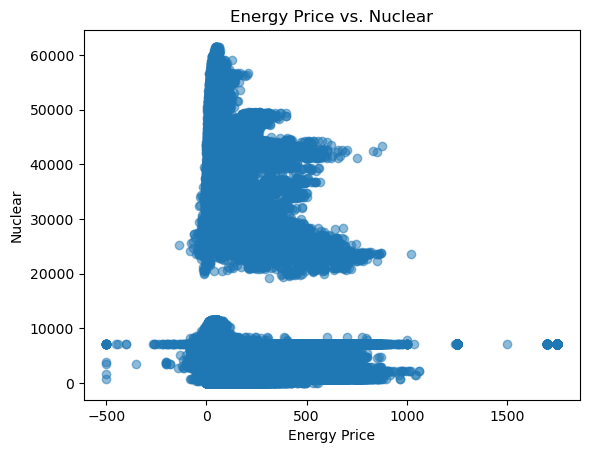

In [41]:
# Relationship target and nuclear
plt.scatter(df_2000['energy_price'], df_2000['nuclear'], alpha=0.5)
plt.title('Energy Price vs. Nuclear')
plt.xlabel('Energy Price')
plt.ylabel('Nuclear')
plt.show()

### Outliers detection

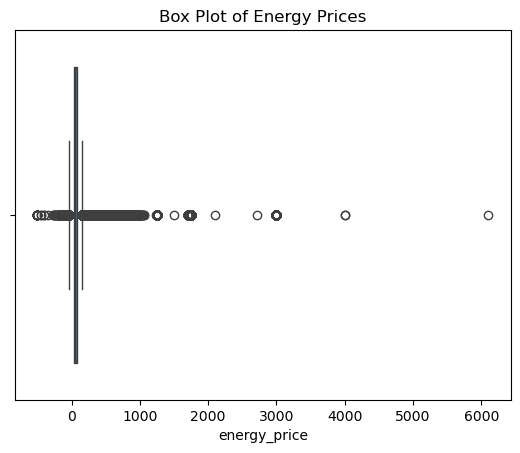

In [42]:
sns.boxplot(x=df['energy_price'])
plt.title('Box Plot of Energy Prices')
plt.show()

### Missing values

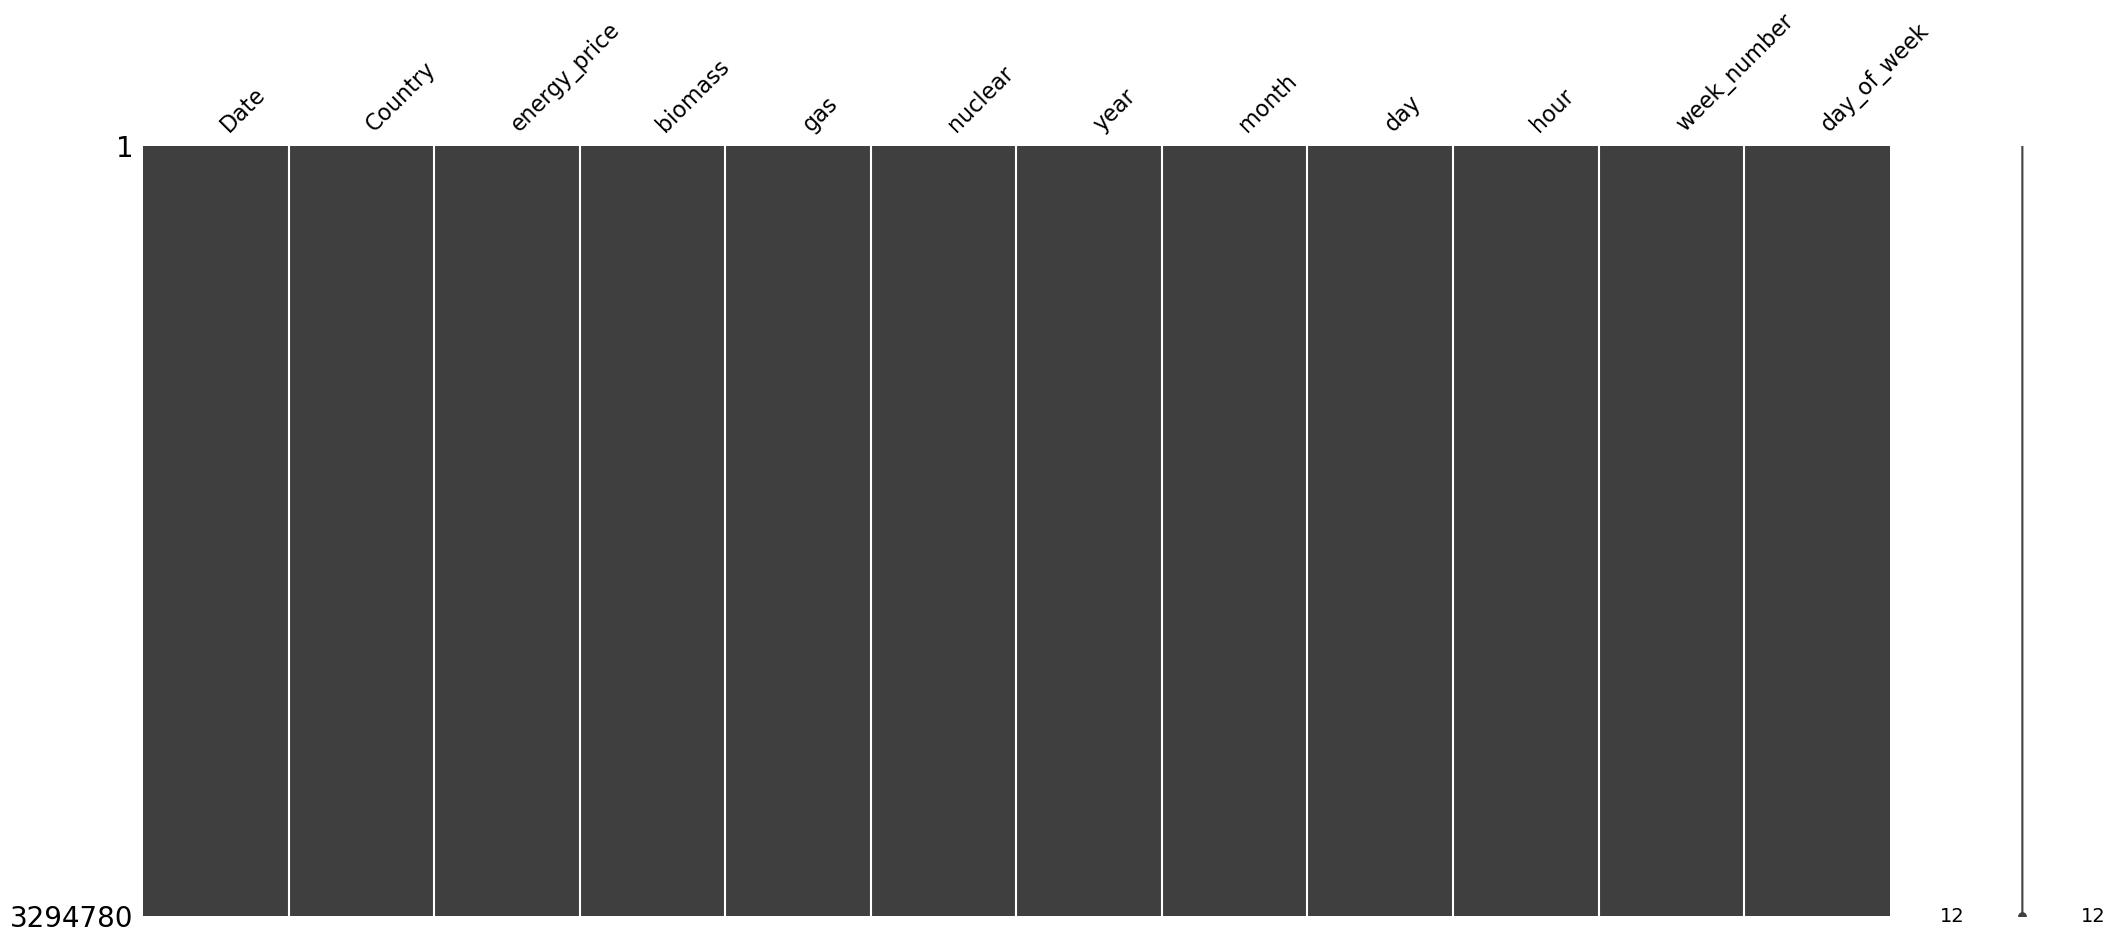

In [43]:
msno.matrix(df)
plt.show()

In [44]:
print(df.isnull().sum())

Date            0
Country         0
energy_price    0
biomass         0
gas             0
nuclear         0
year            0
month           0
day             0
hour            0
week_number     0
day_of_week     0
dtype: int64


We dropped the missing values for the energy_prices column because some of them were too spread in time so I didn't make much sense to use any fill-in strategy such as the mean or past/future values.

## 3. Models

What models did you try? How did they perform? I will want to see charts comparing the performance of a few different models. I will also want to see an exploration of which features should be included and proved to be particularly useful.

### Linear regression

Linear Regression is a statistical model that examines the linear relationship between two or more variables — a dependent variable and independent variables. In its simplest form, linear regression uses a single independent variable to predict the values of the dependent variable. We chose it as a first approximation to the problem because it’s a straightforward, easy-to-implement approach and provides a clear interpretation of how variables impact the target (energy prices). It can serve as a baseline to compare more complex models. If more sophisticated models do not perform significantly better than linear regression, the simpler model may be preferred due to its transparency and efficiency.
This first try includes the linear model with all features in X (excluding variables "Date" and "Country" because they served as index and to avoid multicollinearity due to the fact that these factor variables were transformed into dummies) serves as a benchmark for the next models.

#### Code:

##### Mean Squared Error: 9577.273403544055
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

##### R-squared: 0.33
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

##### Accuracy: 0.83
threshold = y_test.mean()
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

##### Calculate the accuracy score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}') 
  
![alt text](2f02a9fc-a2de-4a29-a84c-6ad975dbf84e.png)

We can observe a logarithmic function associating predicted values and actual values, so we did a log transformation on the features to see its impact on the output (since values over $1,000 per megawatt for energy price can be considered as outliers). Additionally, to avoid generating too big feature matrices (which requires huge memory space), the key variables selected were: source of energy and time features for three years: 2021,2022, and 2023. As shown by the accuracy score (0.85) and R^2 (0.24) the model's predictions are correctly estimating predicted values in 85% of the cases, although due to outliers, these results are not very precise for the entire model (MSE very large). Additionally, R^2 of 0.24 means that the model doesn´t explain the variability of the data around the mean, although since it is a non-linear model, it can hardly tell us more.


#### Code: 

energy_features = ['biomass', 'gas', 'nuclear','weekend','year_2021','year_2022','year_2023']
features_to_keep = energy_features 
X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

degree = 3 

##### Create a pipeline that first transforms the data to polynomial features, then fits a linear model
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])

#### Fit the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### MSE: 11123.742394660521
mse = mean_squared_error(y_test, y_pred)
Test MSE: 11123.742394660521

#### Calculate R-square: 0.24
#### Accuracy score: 0.85 

Ensure y_pred and y_test are one-dimensional
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()

#### Define a threshold for binary classification (e.g., mean of y_test or a specific value)
threshold = y_test.mean()

#### Binarize the predictions and the true values based on the threshold
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

Calculate the accuracy score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
  
![alt text](36b25b44-1423-4a1c-9a29-41a334ccd045.png)

As shown in the plot, the difference between predicted values and observed values in the test set is larger compared to the the previous linear model we fitted.

#### Lasso Regression with interactions

Lastly, since we included dummies to account for different countries and time structure of the data (such as ) then it made sense to use Lasso regression. The idea was to drop variables that have small or non incidence for predicting future prices. To restrict the amount of data space, we selected specific features. Energy features only included biomass, gas, and nuclear energy, which are all our energy sources for electricity. Then, to keep some of the time structure we restricted the creation of interaction terms for years from 2020 to 2024. The dummies that represent months were not considered as interactions but were still considered in the general model.

#### Code:

from sklearn.model_selection import TimeSeriesSplit from sklearn.linear_model import LassoCV

lasso_with_interactions = LassoCV(cv=TimeSeriesSplit(n_splits=20), random_state=42, alphas=np.logspace(-1, 1, 20)) lasso_with_interactions.fit(X_train_scaled, y_train.values.ravel())

#### Predictions with the model
y_pred_test_interactions = lasso_with_interactions.predict(X_test_scaled)

#### Evaluate the model
mse_test_interactions = mean_squared_error(y_test, y_pred_test_interactions) print(f'MSE with Interactions: {mse_test_interactions}')

MSE with Interactions: 9552.11439556307
Optimal Alpha with Interactions: 0.1
R-squared of Lasso with interactions: 0.33
Accuracy score: 0.85

threshold = y_train.values.ravel().mean() # Ensure threshold is a scalar

y_pred_binary = (y_pred_test_interactions >= threshold).astype(int) y_test_binary = (y_test.values.ravel() >= threshold).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)

Plot:  
![alt text](b9b04a85-c4e5-4b81-8cec-b296689491fa.png)

#### Relevant features for Lasso regression with CV and Time series split 

![image.png](attachment:image.png)

### Linear regression with a different dataset without conflicting outliers

#### Filtering the new dataset
df = pd.read_csv("dates_shift.csv")
Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

#### Filter out the rows where the year is 2022
df = df[df['Date'].dt.year != 2022]

##### Filter out rows where 'Country' is either 'RO', 'PL', or 'IT_SACO_DC'
df = df[~df['Country'].isin(['RO', 'PL', 'IT_SACO_DC'])]

#### Define the columns to drop
columns_to_drop = ['year_2022', 'Country_RO', 'Country_PL', 'Country_IT_SACO_DC']

#### Drop the specified columns
df = df.drop(columns=columns_to_drop)

#### Code for linear regression 

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#### Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_shift, y_train_shift)

y_pred = model.predict(X_test_shift)

#### Calculate the MSE
mse = mean_squared_error(y_test_shift, y_pred)
print(f'Test MSE: {mse}')

#### MSE with this dataframe with a linear regression that we'll use as benchmark.
Test MSE: 996.7128023011338
#### R-squared: 0.48
#### Accuracy score: 0.80 

threshold = np.mean(y_test_shift)

#### Binarize the predictions and the true values based on the threshold
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test_shift >= threshold).astype(int)

#### Calculate the accuracy score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')

#### Plot: 
![alt text](6bc8203f-1a41-480b-a54b-15031ffa27c6.png)

Here we can observe less outliers by dropping 2022 as year and some countries that had abnormal price changes.

### Lasso with Cross-validation and TimeSeriesSplit with a filtered dataset without conflicting outliers (same dataframe used with linear regression) 

#### Code

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
import numpy as np

lasso_with_interactions = LassoCV(cv=TimeSeriesSplit(n_splits=30), random_state=42, alphas=np.logspace(-10, 10, 30))
lasso_with_interactions.fit(X_train_shift, y_train_shift.values.ravel())

#### Predict using the model
y_pred_test_interactions = lasso_with_interactions.predict(X_test_shift)

#### Evaluate the model
mse_test_interactions = mean_squared_error(y_test_shift, y_pred_test_interactions)
print(f'MSE with Interactions: {mse_test_interactions}')
#### MSE with Interactions: 994.2483208749895

print(f'Optimal Alpha with Interactions: {lasso_with_interactions.alpha_}')
#### Optimal Alpha with Interactions: 3.290344562312671e-05
#### R-squared with Interactions: 0.48
#### Accuracy score: 0.7975174666809759

#### Accuracy score using the mean of the test set   
threshold = np.mean(y_test_shift)  # Ensure threshold is a scalar

y_pred_binary = (y_pred_test_interactions >= threshold).astype(int)
y_test_binary = (y_test_shift.values.ravel() >= threshold).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy Score: {accuracy}')

Here we are using a dataset without conflicting outliers, although we still have them.   
![alt text](8cdc9434-65c0-4fd6-b02b-d5693e3197f2.png)

#### Feature-importance matrix
![alt text](86ef489f-b7b0-4f8d-9582-2f9c336e7d8b.png)

### ARIMA (Autoregressive Integral Moving Average)

ARIMA is a popular statistical method for time series forecasting that uses data points from previous time steps as input to a regression equation to predict future values. This method combines autoregressive (AR), differencing (I), and moving average (MA) components. We chose it because it's especially useful for data with trends or seasonal patterns, which is typical in energy data. ARIMA is also suitable for univariate series with a reliance on past values, which makes it useful for initial exploration in time series forecasting. 

First, TimeSeriesSplit is initialized with 20 splits. This is used to split the data into training and testing sets while preserving the temporal order, which is crucial for time-series data. Then an ARIMA model is created with specified parameters (p=5, d=1, q=0) where:  
- p: Number of lag observations included in the model (lag order).
- d: Number of times that the raw observations are differenced (degree of differencing).
- q: Size of the moving average window (order of moving average).

The model is fitted to the training data. The model then forecasts the energy prices using the fitted ARIMA model and the forecasted values are converted into a pandas Series and indexed by the same indices as the test set for easy comparison.

#### Code:

#### Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=20)

#### Apply TimeSeriesSplit to df
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {i}:")
    print(f"  Train Indices: {train_index}")
    print(f"  Test Indices: {test_index}")

test = df.iloc[test_index]

#### Fit model
model = ARIMA(y_train, order=(1,0,0))
fitted_model = model.fit()

#### Forecast
y_pred = fitted_model.forecast(steps=len(X_test))

#### Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rs=r2_score(y_test, y_pred)

MSE: 3812.463852796268  
R2: -0.4134327559037574

![alt text](arima.png)


The plot shows a comparison between the actual energy prices (in blue) and the forecasted energy prices (in red). The actual prices display significant variability with frequent spikes and drops, indicating a highly volatile energy market. In contrast, the forecasted prices are relatively flat and fail to capture this variability. This suggests that the ARIMA model used is not effectively modeling the volatility of the energy prices. The forecasted values are almost constant, implying that the model might not be well-tuned for this data or that the chosen ARIMA parameters (5, 1, 0) might not be appropriate. The flat forecast line indicates that the model is not responsive to changes in actual energy prices, which can be due to reasons such as inappropriate differencing, lack of seasonality consideration, or the model order not capturing the underlying patterns. The large discrepancy between the actual and forecasted values suggests that further model tuning or alternative modeling approaches might be necessary. To improve the model's performance, it would be beneficial to re-evaluate the ARIMA parameters, possibly using auto_arima to find the best parameters, incorporate additional features or external factors that might influence energy prices, and explore other time-series models like SARIMA, SARIMAX, or machine learning approaches that can handle the complexity and volatility better.

### Random Forest

Random Forest is an ensemble learning method for regression (and classification) that operates by constructing multiple decision trees during training and outputting the average prediction of the individual trees. It is a robust, versatile model that can handle both numerical and categorical data. We chose it because it's capable of capturing complex nonlinear relationships between the dependent and independent variables without extensive data transformation. It also provides insights into which features are most important in predicting the target variable, which can be valuable for understanding energy price dynamics.

### XGBoost (Gradient Boosting Machines)

XGBoost is an implementation of gradient boosting frameworks that are used for building fast and accurate models. It uses tree-based learning algorithms that successively learn from errors of prior trees, improving accuracy incrementally. We chose it because they are known for delivering high performance and prediction accuracy. Also because it is designed to be efficient, scalable, and to work with large datasets such as ours that has over 3 million observations. It is also effective with datasets having numerous missing values or wide variations in feature scale, common in energy datasets.

## 4. Evaluation

How are you doing evaluation of your models? What is your test set? How did you choose it? How are you doing cross-validation or, more generally, choosing hyperparameters?

## 5. Choice of model

The final part of the writeup should be an argument for which model you believe best satisfies the needs of the context. You should buttress this argument with the charts and diagnostics you have prepared. This doesn’t necessarily mean the model with the lowest overall error! It’s entirely plausible that concerns such as fairness or explainability might be important considerations to you, in which case you should discuss the tradeoffs you have measured on these dimensions. Crucially, however, your determination should be backed by evidence.